<a href="https://colab.research.google.com/github/sisi195/Attention-Blitz/blob/main/Attention_Blitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd_data = pd.read_csv('patient_info.csv', delimiter=';')
df = pd.DataFrame(pd_data)
df.head()

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,...,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6.0,1,11:00:00,21.0,0,...,2.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,...,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,...,6.0,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,...,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Data Cleaning

In [ ]:
# check for dulicate values
duplicates = df.duplicated()
print(duplicates.sum())

0


In [ ]:
# identif missing values
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

ID                          0
SEX                         0
AGE                         0
ACC                         0
ACC_TIME                   18
ACC_DAYS                   18
HRV                         0
HRV_TIME                   23
HRV_HOURS                  23
CPT_II                      0
ADHD                        0
ADD                         0
BIPOLAR                     0
UNIPOLAR                    0
ANXIETY                     0
SUBSTANCE                   0
OTHER                       0
CT                          0
MDQ_POS                     0
WURS                        5
ASRS                        7
MADRS                      13
HADS_A                     15
HADS_D                     15
MED                         0
MED_Antidepr               84
MED_Moodstab               97
MED_Antipsych             100
MED_Anxiety_Benzo          95
MED_Sleep                 100
MED_Analgesics_Opioids    101
MED_Stimulants            102
filter_$                    0
dtype: int

In [ ]:
# Detect Outliers
# Detect Outliers using Z-score method
# Calculate Z-scores for all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col + '_zscore'] = (df[col] - df[col].mean()) / df[col].std()

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers = df[(df[numerical_cols + '_zscore'].abs() > threshold).any(axis=1)]

print(outliers)

      ID  SEX  AGE  ACC  ACC_TIME  ACC_DAYS  HRV  HRV_TIME  HRV_HOURS  CPT_II  \
0      1    0    3    1  16:00:00       6.0    1  11:00:00       21.0       0   
3      4    1    3    0       NaN       NaN    1  16:55:00       22.0       1   
8     10    1    3    1  09:46:00       9.0    0       NaN        NaN       0   
17    19    1    3    1  11:00:00       7.1    1  11:00:00       10.0       1   
24    26    1    2    1  15:30:00       2.2    0       NaN        NaN       1   
25    27    0    1    1  11:45:00       8.5    1  11:45:00       18.0       1   
39    42    1    3    1  11:00:00       6.6    1  12:00:00       10.0       1   
47    50    0    1    1  15:00:00       7.1    1  15:00:00       24.0       0   
54    57    0    1    1  10:55:00       3.3    1  11:00:00       15.0       1   
56    59    0    1    1  15:00:00       2.9    1  15:00:00       17.0       1   
64    67    0    3    1  10:30:00       7.0    0       NaN        NaN       1   
66    69    1    1    0     

# **Data Manipulation**

In [21]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd_data = pd.read_csv('patient_info.csv', delimiter=';')
df = pd.DataFrame(pd_data)
df.head()

,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,CPT_II,...,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,1,0,3,1,16:00:00,6.0,1,11:00:00,21.0,0,...,2.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,1,...,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,1,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,1,...,6.0,1,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0
4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,1,...,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# **Analyzing Antidepressant Usage by Gender and Age**

In [22]:
import pandas as pd

# Load the dataset with the correct delimiter
df = pd.read_csv('patient_info.csv', delimiter=';') # Added delimiter=';'

# Map the SEX column values
df['SEX'] = df['SEX'].map({0: 'Female', 1: 'Male'})

# Filter the dataset to include only patients taking antidepressants
filtered_df = df[~pd.isnull(df['MED_Antidepr'])]

# Group the dataset by SEX and calculate the count, mean, and standard deviation of age for each group
grouped_df = filtered_df.groupby('SEX').agg(
    count=('AGE', 'size'),
    mean_age=('AGE', 'mean'),
    std_age=('AGE', 'std')
).reset_index()

# Display the final DataFrame
print(grouped_df)

      SEX  count  mean_age   std_age
0  Female      8  2.250000  1.281740
1    Male     11  2.727273  0.904534


## **Analyzing Heart Rate Variability (HRV) by Gender**

In [25]:
import pandas as pd

# Load the dataset with the correct delimiter
df = pd.read_csv('patient_info.csv', delimiter=';') # Added delimiter=';'

# Map the SEX column values
df['SEX'] = df['SEX'].map({0: 'Female', 1: 'Male'})

# Filter the dataset to include only patients with HRV data
filtered_df = df[~pd.isnull(df['HRV'])]

# Group the dataset by SEX and calculate the mean and standard deviation of HRV for each group
grouped_df = filtered_df.groupby('SEX').agg(
    count=('HRV', 'size'),
    mean_hrv=('HRV', 'mean'),
    std_hrv=('HRV', 'std')
).reset_index()

# Display DataFrame
print(grouped_df)

      SEX  count  mean_hrv   std_hrv
0  Female     50  0.760000  0.431419
1    Male     53  0.792453  0.409432


# **Data Visualization**

**Description: This histogram shows the distribution of ages for participants with different mood disorders. This visualization can help identify the age ranges most affected by specific mood disorders. It can also highlight any significant differences in age distribution among the various disorders.**

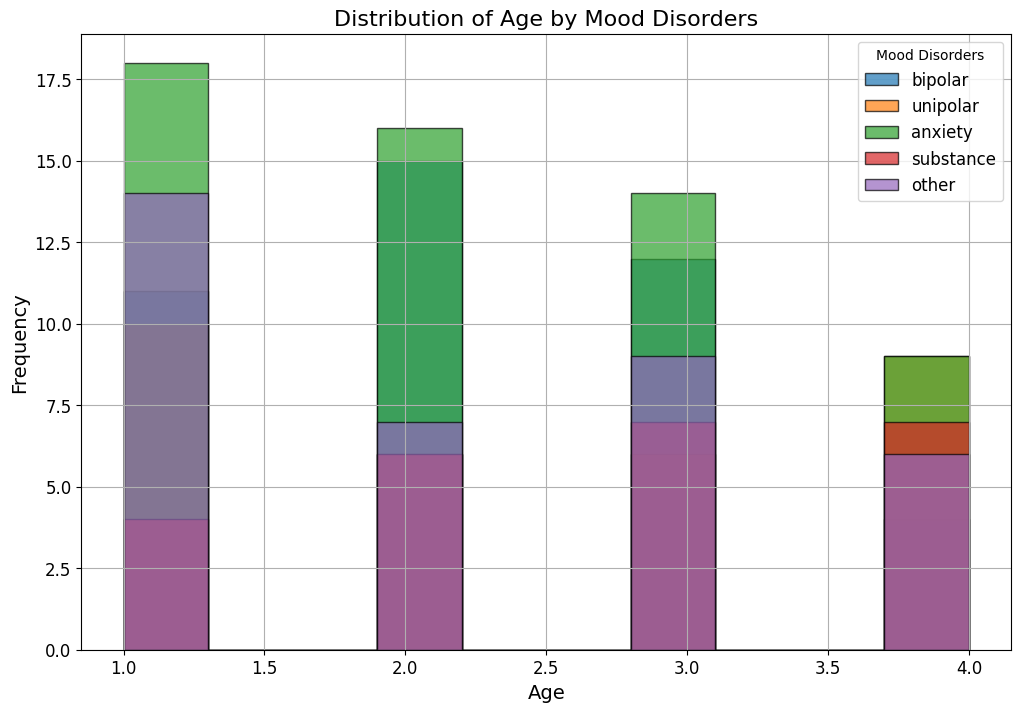

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/patient_info.csv', delimiter=';')

# Concatenated column names
data.columns = ['id', 'sex', 'age', 'acc', 'acc_time', 'acc_days', 'hrv', 'hrv_time', 'hrv_hours', 'cpt_ii', 'adhd', 'add', 'bipolar', 'unipolar', 'anxiety', 'substance', 'other', 'ct', 'mdq_pos', 'wurs', 'asrs', 'madrs', 'hads_a', 'hads_d', 'med', 'med_antidepr', 'med_moodstab', 'med_antipsych', 'med_anxiety_benzo', 'med_sleep', 'med_analgesics_opioids', 'med_stimulants', 'filter_$']

# Columns related to age and mood disorder
mood_disorder = ['bipolar', 'unipolar', 'anxiety', 'substance', 'other']
columns = data[['age'] + mood_disorder]

# Filter data for people with mood orders
data = columns[(columns[mood_disorder] == 1).any(axis=1)]

# Create a histogram
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Distinct colors
for mood_disorder, color in zip(mood_disorder, colors):
    plt.hist(data[data[mood_disorder] == 1]['age'], bins=10, alpha=0.7, label=f'{mood_disorder}', edgecolor='black', color=color)

# Customize the plot
plt.title('Distribution of Age by Mood Disorders', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Mood Disorders', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Description: A count plot is useful for visualizing the frequency of different categories, such as sex. To show the distribution of participants by sex, we can use a count plot to identify any imbalances in the dataset.**

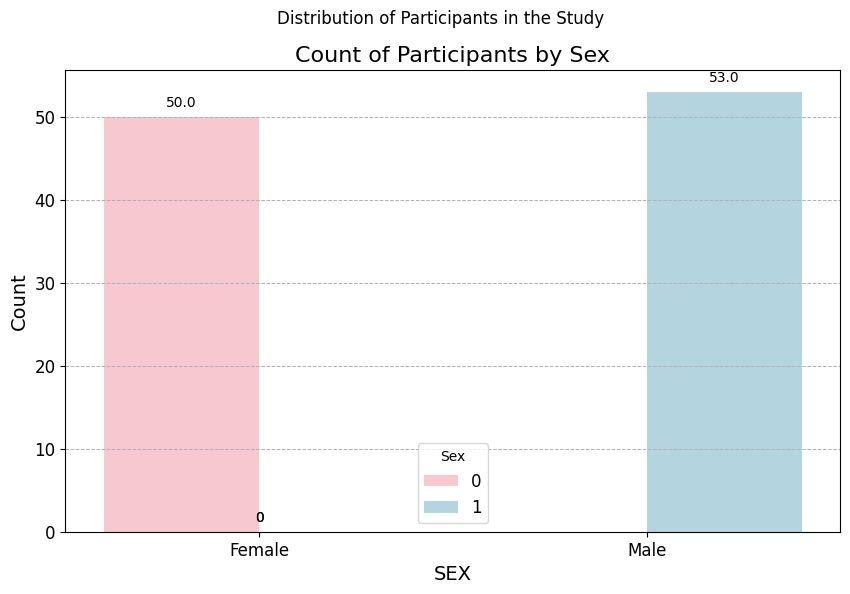

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/patient_info.csv', delimiter=';')

# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='SEX', hue='SEX', palette={0: 'pink', 1: 'lightblue'}, dodge=True)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Count of Participants by Sex', fontsize=16)
plt.suptitle('Distribution of Participants in the Study', fontsize=12)
plt.xlabel('SEX', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sex', fontsize=12)

# Add grid lines to the y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()


## **Description a scatter plot of ages is a critical variable that provides valuable insights into the study and draw meaningful conclusions.**

In [29]:
import plotly.express as px
import pandas as pd

# Load your dataset, specifying the delimiter as semicolon
data = pd.read_csv('/content/patient_info.csv', delimiter=';')

# Map the SEX column values
data['SEX'] = data['SEX'].map({0: 'Female', 1: 'Male'})

# Create scatter plot with customized colors
fig = px.scatter(data,
                 x='ID',
                 y='AGE',
                 title='Scatter Plot of Patient Ages by ID',
                 labels={'ID': 'Patient ID', 'AGE': 'Age'},
                 color='SEX',  # Color by SEX
                 color_discrete_map={'Female': 'pink', 'Male': 'lightblue'},  # Custom colors
                 size='HRV',  # Assuming 'HRV' column exists for marker size
                 hover_data=['HRV', 'MED_Antidepr'])  # Assuming these columns exist

# Customize layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_text='Gender'
)

fig.show()
